In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
train_image_features_path = '../data/GOD/image_features_train.npy'
test_image_features_path = '../data/GOD/image_features.npy'

train_category_path = '../data/GOD/category_train.csv'
test_category_path = '../data/GOD/category_test.csv'


target_dir = '/home/yainoue/meg2image/results/20230417_sbj01_seq2stat/inference'
test_labels_path = os.path.join(target_dir, 'labels_test.npy')
test_pred_features_path = os.path.join(target_dir, 'pred_features_test.npy')
train_labels_path = os.path.join(target_dir, 'labels_train.npy')
train_pred_features_path = os.path.join(target_dir, 'pred_features_train.npy')

In [3]:
with open(train_category_path) as f:
    reader = csv.reader(f)
    train_cat = []
    for r in reader:
        train_cat += r
with open(test_category_path) as f:
    reader = csv.reader(f)
    test_cat = []
    for r in reader:
        test_cat += r
        
train_image_features = np.load(train_image_features_path)
test_image_features = np.load(test_image_features_path)

test_pred_features = np.load(test_pred_features_path)
test_labels = np.load(test_labels_path)

train_pred_features = np.load(train_pred_features_path)
train_labels = np.load(train_labels_path)

train_pred_cats = []
for c in train_labels:
    id_ = (c-1)//8
    train_pred_cats.append(train_cat[id_])
test_pred_cats = []
for c in test_labels:
    test_pred_cats.append(test_cat[c-1])

In [4]:
train_cat_image_features_avg = []
for i in range(int(len(train_image_features)/8)):
    start = i * 8
    end = (i+1) * 8
    cat_avg = np.mean(train_image_features[start:end,:], axis=0, keepdims=True)
    train_cat_image_features_avg.append(cat_avg)
    
train_cat_image_features_avg = np.concatenate(train_cat_image_features_avg, axis=0)


test_labels_unique = np.unique(test_labels)
test_pred_features_avg = []
for i in range(len(test_labels_unique)):
    target_ids = test_labels== i+1
    test_pred_features_avg.append(test_pred_features[target_ids].mean(axis=0, keepdims=True))
test_pred_features_avg = np.concatenate(test_pred_features_avg, axis=0)

In [5]:
test_pred_features_avg

array([[-0.06824003,  0.00055291, -0.00147425, ...,  0.194422  ,
         0.05930007,  0.11897398],
       [-0.07748845, -0.06807086,  0.00291177, ...,  0.20742488,
         0.03889466,  0.10587576],
       [-0.06641656, -0.01629701, -0.026875  , ...,  0.18126883,
         0.02830761,  0.13323207],
       ...,
       [-0.09646755, -0.06187202,  0.03544342, ...,  0.22700717,
         0.02799049,  0.10551084],
       [-0.04137433, -0.06370759, -0.01147156, ...,  0.17118609,
         0.02573117,  0.04335377],
       [-0.08511078, -0.06095409, -0.02380625, ...,  0.24749213,
        -0.00415051,  0.04340861]], dtype=float32)

In [6]:
test_pred_features[test_labels==1].mean(axis=0, keepdims=True)

array([[-6.82400316e-02,  5.52912534e-04, -1.47425325e-03,
        -9.50643197e-02, -1.53130991e-02,  6.90829158e-02,
        -6.41059056e-02,  3.66038233e-01,  3.52580845e-02,
         2.76089162e-02,  9.67189670e-02,  2.27267202e-02,
         1.18269473e-02,  1.10325962e-02,  6.26651421e-02,
        -4.85080071e-02, -3.54420394e-02,  1.05140321e-01,
        -7.03306636e-03, -7.55058462e-03,  2.44437307e-02,
        -2.03310326e-02,  5.47790714e-02,  2.08675861e-04,
         4.28939015e-02,  5.62387966e-02, -6.50318414e-02,
        -7.35731656e-03, -4.69457172e-02, -2.87590865e-02,
        -2.19109338e-02, -3.28460000e-02,  6.96682259e-02,
        -4.54898328e-02, -1.60267837e-02, -3.03759892e-02,
        -5.20886742e-02,  2.44959742e-02, -3.72777373e-04,
         2.85088215e-02,  1.12690292e-01,  2.51997262e-02,
        -3.45893688e-02,  7.22707883e-02,  5.24990559e-02,
         3.19005884e-02, -4.41551097e-02, -2.32963916e-02,
         5.45937754e-02,  1.60857532e-02,  5.70114665e-0

# Train Image (AVG) vs Test Image

[[1.         0.74991196 0.77040982 ... 0.48660085 0.43744312 0.46784548]
 [0.74991196 1.         0.97256515 ... 0.46133996 0.47905608 0.50767602]
 [0.77040982 0.97256515 1.         ... 0.45814013 0.47355479 0.50608662]
 ...
 [0.48660085 0.46133996 0.45814013 ... 1.         0.56144309 0.5761439 ]
 [0.43744312 0.47905608 0.47355479 ... 0.56144309 1.         0.61554665]
 [0.46784548 0.50767602 0.50608662 ... 0.5761439  0.61554665 1.        ]]


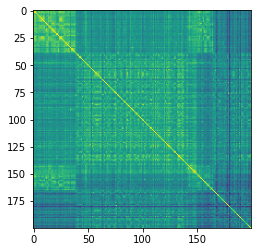

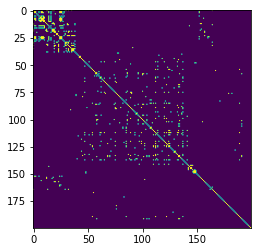

In [7]:
total_image_features = np.concatenate([train_cat_image_features_avg, test_image_features], axis=0)
total_labels = train_cat + test_cat
corr = np.corrcoef(total_image_features)
print(corr)

plt.imshow(corr)
plt.show()
plt.imshow((corr>0.8).astype(np.int8))
plt.show()

In [8]:
ranking = np.argsort(corr, axis=1)[:,::-1]

# test corr
for row in ranking[-50:]:
    print(total_labels[row[0]], ':' ,[total_labels[r] for r in row[1:6]])

Goldfish : ['octopus', 'starfish', 'frog_1', 'turtle', 'dolphin']
owl : ['ostrich', 'raccoon', 'frog_2', 'bear', 'giraffe']
nan : ['frog_1', 'praying_mantis', 'frog_2', 'snake', 'grasshopper']
duck : ['duck', 'bird_2', 'crested_ibis', 'penguin', 'water_bowl']
swan : ['duck', 'crested_ibis', 'bird_2', 'ostrich', 'duck']
nan : ['flower_pot', 'teapot', 'trilobite', 'cochlea', 'octopus']
crab : ['scorpion', 'horseshoe_crab', 'octopus', 'frog_2', 'spider']
orca : ['penguin', 'dolphin', 'bear', 'elephant', 'bird_2']
leopard : ['giraffe', 'bear', 'gorilla', 'elephant', 'raccoon']
Bat : ['raccoon', 'frog_1', 'frog_2', 'spider', 'porcupine']
fly : ['cockroach', 'grasshopper', 'spider', 'praying_mantis', 'centipede']
butterfly : ['grasshopper', 'cochlea', 'frog_1', 'centipede', 'spider']
goat : ['lama', 'deer', 'dog_1', 'kangaroo', 'horse']
camel : ['ostrich', 'giraffe', 'lama', 'horse', 'elephant']
lama : ['horse', 'ostrich', 'giraffe', 'kangaroo', 'goat']
airplane : ['airship', 'helicopter', '

# Test Pred (AVG), Train Image (AVG)

50 150
[[1.         0.77586603 0.86917183 ... 0.03649613 0.01915577 0.03120084]
 [0.77586603 1.         0.84104548 ... 0.02249373 0.03472726 0.02643563]
 [0.86917183 0.84104548 1.         ... 0.05666878 0.04675196 0.04547304]
 ...
 [0.03649613 0.02249373 0.05666878 ... 1.         0.89741394 0.82211575]
 [0.01915577 0.03472726 0.04675196 ... 0.89741394 1.         0.87863461]
 [0.03120084 0.02643563 0.04547304 ... 0.82211575 0.87863461 1.        ]]


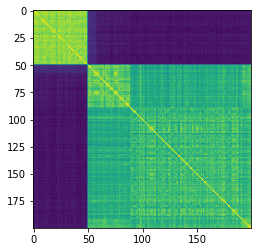

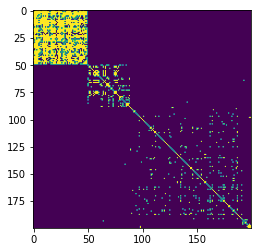

In [9]:
pred_image_features = np.concatenate([test_pred_features_avg, train_cat_image_features_avg], axis=0)
pred_labels = test_cat + train_cat#  + test_cat
pred_corr = np.corrcoef(pred_image_features)
print(len(test_cat), len(train_cat))
print(pred_corr)

plt.imshow(pred_corr)
plt.show()
plt.imshow((pred_corr>0.8).astype(np.int8))
plt.show()

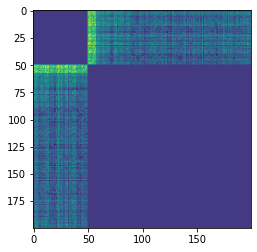

Goldfish : ['snake', 'frog_2', 'trilobite', 'ostrich', 'frog_1']
owl : ['rhinoceros', 'frog_1', 'snake', 'scorpion', 'ostrich']
nan : ['trilobite', 'ostrich', 'frog_2', 'frog_1', 'snake']
duck : ['ostrich', 'trilobite', 'rhinoceros', 'snake', 'frog_2']
swan : ['frog_2', 'frog_1', 'snake', 'ostrich', 'scorpion']
nan : ['trilobite', 'ostrich', 'rhinoceros', 'frog_2', 'frog_1']
crab : ['turtle', 'frog_2', 'trilobite', 'frog_1', 'scorpion']
orca : ['frog_1', 'scorpion', 'frog_2', 'rhinoceros', 'turtle']
leopard : ['rhinoceros', 'trilobite', 'ostrich', 'frog_1', 'frog_2']
Bat : ['frog_1', 'frog_2', 'scorpion', 'rhinoceros', 'ostrich']
fly : ['rhinoceros', 'frog_1', 'scorpion', 'ostrich', 'trilobite']
butterfly : ['frog_2', 'frog_1', 'rhinoceros', 'snake', 'trilobite']
goat : ['ostrich', 'frog_2', 'turtle', 'scorpion', 'frog_1']
camel : ['frog_2', 'scorpion', 'frog_1', 'trilobite', 'rhinoceros']
lama : ['frog_1', 'frog_2', 'snake', 'scorpion', 'rhinoceros']
airplane : ['ostrich', 'snake', 's

In [10]:
test_start_id = 0
test_end_id = len(test_cat)

pred_corr[:test_end_id, :test_end_id] = 0
pred_corr[test_end_id:, test_end_id:] = 0
pred_corr
plt.imshow(pred_corr)
plt.show()

pred_ranking = np.argsort(pred_corr, axis=1)[:,::-1]

# test corr
for i, row in enumerate(pred_ranking[test_start_id:test_end_id]):
    print(pred_labels[i+test_start_id], ':' ,[pred_labels[r] for r in row[:5]])

# Train Pred, Test Pred, Train Image (AVG), Test Image

768 300 150 50
[[ 1.          0.57596924  0.53442588 ... -0.01486964 -0.02870013
   0.01908956]
 [ 0.57596924  1.          0.25942643 ...  0.02026624 -0.02124821
   0.0072545 ]
 [ 0.53442588  0.25942643  1.         ... -0.01264118 -0.02551319
   0.04785919]
 ...
 [-0.01486964  0.02026624 -0.01264118 ...  1.          0.56144309
   0.5761439 ]
 [-0.02870013 -0.02124821 -0.02551319 ...  0.56144309  1.
   0.61554665]
 [ 0.01908956  0.0072545   0.04785919 ...  0.5761439   0.61554665
   1.        ]]


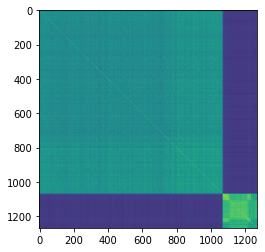

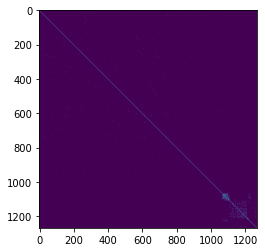

In [11]:
pred_image_features = np.concatenate([train_pred_features, test_pred_features, train_cat_image_features_avg, test_image_features], axis=0)
pred_labels = train_pred_cats + test_pred_cats + train_cat + test_cat
pred_corr = np.corrcoef(pred_image_features)
print(len(train_pred_cats), len(test_pred_cats), len(train_cat), len(test_cat))
print(pred_corr)

plt.imshow(pred_corr)
plt.show()
plt.imshow((pred_corr>0.8).astype(np.int8))
plt.show()

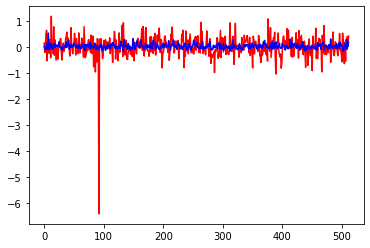

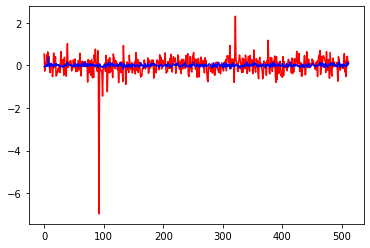

In [12]:
plt.plot(np.arange(test_image_features.shape[1]), test_image_features[test_labels[0],:], 'r-')
plt.plot(np.arange(test_pred_features.shape[1]), test_pred_features[0,:], 'b-')
plt.show()

plt.plot(np.arange(train_image_features.shape[1]), train_image_features[train_labels[0]//8,:], 'r-')
plt.plot(np.arange(train_pred_features.shape[1]), train_pred_features[0,:], 'b-')
plt.show()

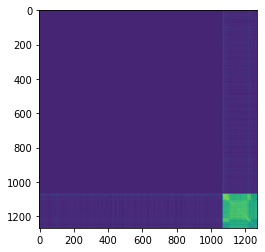

goat : ['scorpion', 'trilobite', 'bulldozer', 'turtle', 'camel']
grave : ['rhinoceros', 'snake', 'frog_2', 'frog_1', 'trilobite']
post : ['rhinoceros', 'scorpion', 'ostrich', 'golfball', 'turtle']
videoplayer : ['trilobite', 'turtle', 'rhinoceros', 'frog_1', 'Goldfish']
knob : ['ostrich', 'camel', 'scorpion', 'snake', 'man_with_hammock']
nan : ['trilobite', 'snake', 'ostrich', 'frog_2', 'turtle']
socks : ['frog_1', 'frog_2', 'crab', 'rhinoceros', 'nan']
socks : ['frog_2', 'scorpion', 'nan', 'frog_1', 'snake']
carrier : ['turtle', 'snake', 'frog_1', 'frog_2', 'crab']
leopard : ['ostrich', 'trilobite', 'coin', 'frog_2', 'frog_1']
hat : ['scorpion', 'frog_1', 'frog_2', 'ostrich', 'crab']
owl : ['nan', 'snake', 'frog_2', 'horn', 'rhinoceros']
carrier : ['frog_1', 'buttery?', 'ostrich', 'coin', 'owl']
crab : ['scorpion', 'crab', 'turtle', 'trilobite', 'camel']
fire_extinguisher : ['trilobite', 'frog_2', 'frog_1', 'turtle', 'ostrich']
washing_machine : ['man_with_hat', 'turtle', 'frog_1', 'f

In [13]:
test_start_id = len(train_pred_cats)
test_end_id = test_start_id + len(test_pred_cats)

pred_corr[:test_end_id, :test_end_id] = 0
plt.imshow(pred_corr)
plt.show()

pred_ranking = np.argsort(pred_corr, axis=1)[:,::-1]

# test corr
for i, row in enumerate(pred_ranking[test_start_id:test_end_id]):
    print(pred_labels[i+test_start_id], ':' ,[pred_labels[r] for r in row[:5]])

In [14]:
# train corr
train_start_id = 0
for i, row in enumerate(pred_ranking[train_start_id:train_start_id+50]):
    print(pred_labels[i+train_start_id], ':' ,[pred_labels[r] for r in row[:5]])

horn : ['kitchen', 'turtle', 'crab', 'ostrich', 'trilobite']
kangaroo : ['frog_2', 'trilobite', 'nan', 'fighter', 'kangaroo']
grasshopper : ['snake', 'frog_1', 'duck', 'frog_2', 'turtle']
tent : ['frog_2', 'scorpion', 'nan', 'tent', 'frog_1']
bear : ['frog_2', 'duck', 'frog_1', 'owl', 'bear']
refrigerator : ['ostrich', 'shredder', 'scorpion', 'snake', 'duck']
treadmill : ['rhinoceros', 'trilobite', 'crab', 'treadmill', 'socks']
horseshoe_crab : ['scorpion', 'ostrich', 'trilobite', 'frog_1', 'horseshoe_crab']
Loudspeaker : ['turtle', 'camel', 'snake', 'frog_2', 'tie']
bustab : ['frog_1', 'frog_2', 'nan', 'man_with_hat', 'owl']
flashlight : ['scorpion', 'turtle', 'rhinoceros', 'frog_1', 'yacht']
keyboard : ['frog_2', 'frog_1', 'keyboard', 'man_with_hammock', 'nan']
game : ['rhinoceros', 'coin', 'frog_1', 'game', 'frog_2']
hourglass : ['hourglass', 'turtle', 'snake', 'camel', 'ostrich']
dog_1 : ['scorpion', 'nan', 'frog_1', 'frog_2', 'tricycle']
dumbbell : ['snake', 'frog_2', 'frog_1', 'n

In [15]:

def calc_similarity(x, y):
    batch_size = len(x)
    gt_size = len(y)
    
    similarity = torch.empty(batch_size, gt_size).to('cuda')
    for i in range(batch_size):
        for j in range(gt_size):
            similarity[i, j] = (x[i] @ y[j]) / max((x[i].norm() * y[j].norm()), 1e-8)
    return similarity.cpu().numpy()

In [16]:
import torch
import sys
sys.path.append('../')
from meg_decoding.models import get_model, Classifier

classifier = Classifier(None)
Z = torch.Tensor(train_pred_features).to('cuda')

Y = []
for l in train_labels:
    Y.append(train_image_features[l-1])
Y = np.stack(Y, axis=0)
Y = torch.Tensor(Y).to('cuda')

trainTop1acc, trainTop10acc = classifier(Z, Y, test=False)
print('TRAIN: Acc Top1/10', trainTop1acc, trainTop10acc)

similarity = calc_similarity(Z, Y)
acc_tmp = np.zeros(len(similarity))
for i in range(len(similarity)):
    acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
print('TEST: Similarity Acc', np.mean(acc_tmp))

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TRAIN: Acc Top1/10 0.5924479365348816 0.94140625
TEST: Similarity Acc 0.9981326053889612


In [ ]:
np.sum(similarity[i,:] < similarity[i,i])

In [17]:
Z = torch.Tensor(test_pred_features_avg).to('cuda')

Y = []
for l in np.arange(1,51):# test_labels:
    Y.append(test_image_features[l-1])
Y = np.stack(Y, axis=0)
Y = torch.Tensor(Y).to('cuda')

testTop1acc, testTop10acc, testTopKacc = classifier(Z, Y, test=False, top_k=25)
print('TEST(AVG): Acc Top1/10/K', testTop1acc, testTop10acc, testTopKacc)


similarity = calc_similarity(Z, Y)
acc_tmp = np.zeros(len(similarity))
for i in range(len(similarity)):
    acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
print('TEST(AVG): Similarity Acc', np.mean(acc_tmp))

TEST(AVG): Acc Top1/10/K 0.03999999910593033 0.32 0.66
TEST(AVG): Similarity Acc 0.5604081632653062


In [18]:
mean_Acc = {'testTop1acc': [], 'testTop10acc':[], 'testTopKacc':[],'test Similarityacc':[]}
for sess in range(6):
    Z = []
    Y = []
    for l in range(1, 51): # test_labels:
        target_id = np.where(test_labels==l)[0][sess]
        Z.append(test_pred_features[target_id])
        Y.append(test_image_features[l-1])
    Y = np.stack(Y, axis=0)
    Y = torch.Tensor(Y).to('cuda')
    Z = np.stack(Z, axis=0)
    Z = torch.Tensor(Z).to('cuda')

    testTop1acc, testTop10acc, testTopKacc = classifier(Z, Y, test=False, top_k=25)
    print('TEST: Acc Top1/10/K', testTop1acc, testTop10acc, testTopKacc)


    similarity = calc_similarity(Z, Y)
    acc_tmp = np.zeros(len(similarity))
    for i in range(len(similarity)):
        acc_tmp[i] = np.sum(similarity[i,:] < similarity[i,i]) / (len(similarity)-1)
    print('TEST: Similarity Acc', np.mean(acc_tmp))
    mean_Acc['testTop1acc'].append(testTop1acc)
    mean_Acc['testTop10acc'].append(testTop10acc)
    mean_Acc['testTopKacc'].append(testTopKacc)
    mean_Acc['test Similarityacc'].append(np.mean(acc_tmp))

print({k:'{:.3f}'.format(np.mean(v)) for k, v in mean_Acc.items()})

TEST: Acc Top1/10/K 0.03999999910593033 0.12 0.5
TEST: Similarity Acc 0.5281632653061226
TEST: Acc Top1/10/K 0.019999999552965164 0.22 0.58
TEST: Similarity Acc 0.5485714285714286
TEST: Acc Top1/10/K 0.05999999865889549 0.14 0.42
TEST: Similarity Acc 0.46693877551020413
TEST: Acc Top1/10/K 0.019999999552965164 0.3 0.6
TEST: Similarity Acc 0.58
TEST: Acc Top1/10/K 0.0 0.24 0.66
TEST: Similarity Acc 0.5714285714285714
TEST: Acc Top1/10/K 0.03999999910593033 0.26 0.68
TEST: Similarity Acc 0.5893877551020408
{'testTop1acc': '0.030', 'testTop10acc': '0.213', 'testTopKacc': '0.573', 'test Similarityacc': '0.547'}


In [19]:
similarity

array([[-0.02829436,  0.021185  ,  0.03548387, ..., -0.03496352,
        -0.0449915 , -0.03700984],
       [ 0.00924444,  0.0474132 ,  0.048658  , ..., -0.00230785,
         0.02518838,  0.04114052],
       [ 0.03573305,  0.10414703,  0.09177056, ...,  0.03593158,
         0.04384382,  0.10292213],
       ...,
       [-0.00134944,  0.01704587,  0.03670729, ..., -0.0302972 ,
        -0.0075427 , -0.0084782 ],
       [ 0.03754435,  0.05194615,  0.06902866, ...,  0.00701771,
         0.00141289, -0.0053163 ],
       [ 0.01080816,  0.04355977,  0.03786531, ...,  0.00411169,
        -0.00474188,  0.03192064]], dtype=float32)

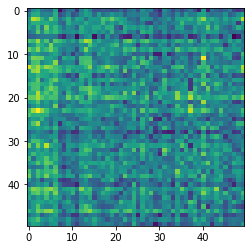

In [20]:
similarity = calc_similarity(Z, Y)
plt.imshow(similarity)

In [21]:
print(np.sort(similarity, axis=1)[:,::-1])
sorted_similarity = np.argsort(similarity, axis=1)[:, ::-1]

[[ 0.04108303  0.04088428  0.03548387 ... -0.05713566 -0.06061254
  -0.06656156]
 [ 0.05157361  0.048658    0.0474132  ... -0.02635343 -0.02831518
  -0.0399184 ]
 [ 0.10414703  0.10292213  0.09177056 ... -0.00605685 -0.01238619
  -0.01508587]
 ...
 [ 0.04187033  0.03670729  0.03446947 ... -0.04422709 -0.05808438
  -0.05826079]
 [ 0.06902866  0.05455588  0.05391106 ... -0.01362184 -0.0174164
  -0.02178394]
 [ 0.04902737  0.04355977  0.03786531 ... -0.03734122 -0.04704913
  -0.06549982]]


In [22]:
for i, sim in enumerate(sorted_similarity[:50,:]):
    print(train_pred_cats[i], ': ', [train_pred_cats[s] for s in sim[:5]],  [train_labels[s] for s in sim[:5]])

horn :  ['treadmill', 'hourglass', 'grasshopper', 'penguin', 'tent'] [1085, 644, 198, 155, 1052]
kangaroo :  ['treadmill', 'grasshopper', 'kangaroo', 'horn', 'hourglass'] [1085, 198, 107, 532, 644]
grasshopper :  ['kangaroo', 'horn', 'grasshopper', 'penguin', 'game'] [107, 532, 198, 155, 655]
tent :  ['kangaroo', 'Fern', 'deer', 'bustab', 'kangaroo'] [109, 1192, 255, 362, 107]
bear :  ['bear', 'camera', 'grasshopper', 'treadmill', 'game'] [187, 415, 198, 1085, 655]
refrigerator :  ['grasshopper', 'bear', 'treadmill', 'game', 'tent'] [198, 187, 1085, 655, 1052]
treadmill :  ['dog_1', 'teapot', 'penguin', 'centipede', 'hourglass'] [176, 1022, 155, 75, 644]
horseshoe_crab :  ['hourglass', 'grasshopper', 'dog_1', 'clip', 'driver'] [644, 198, 176, 796, 900]
Loudspeaker :  ['refrigerator', 'dog_1', 'Copier', 'grasshopper', 'game'] [849, 176, 813, 198, 655]
bustab :  ['grasshopper', 'hourglass', 'refrigerator', 'horn', 'knife'] [198, 644, 849, 532, 436]
flashlight :  ['horn', 'penguin', 'game

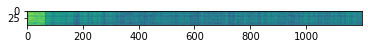

In [21]:
similarity = calc_similarity(Z, torch.Tensor(train_image_features).cuda())
plt.imshow(similarity)